In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
start=time.time()

In [2]:
def ff(x):
    f1=4*x[0]**2 +4*x[1]**2
    f2=(x[0]-5)**2+(x[1]-5)**2
    return f1, f2
def g(x):
    estatu=None
    g1=(x[0]-5)**2+x[1]**2 #<=25
    g2=(x[0]-8)**2+(x[1]+3)**2 #>=7.7
    if g1<=25 and g2>=7.7:
        status=True
    else:
        status=False
    return status

In [3]:
xmax=np.array([5,3])
xmin=np.array([0,0])
fator=np.array([0.7,0.5])

In [4]:
def maxmin(fun1, fun2):
    R1=max(fun1)-min(fun1)
    R2=max(fun2)-min(fun2)
    return R1, R2

In [5]:
#função para verificar se a solução esta contida no archive
def inc(x, ficheiro):
    aux=None
    for i in range(ficheiro.shape[0]):
        j=0
        for col in range(0,ficheiro.shape[1]):
            if x[col] == ficheiro[i][col]:
                j=j+1
        if j == ficheiro.shape[1]:
            aux = True
        else:
            aux=False
            
    return aux

In [6]:
def dom(fun1, fun2, nfun1, nfun2,R1,R2):
    deltadom=0
    if (fun1 !=nfun1  and fun2 !=nfun2):
        deltadom=abs(fun1-nfun1)/R1*abs(fun2-nfun2)/R2
    return deltadom
def maxdom(fun1,fun2,f1n, f2n, R1,R2):
    for i in range(fun1.size):
        aux[i]=dom(fun1[i],fun2[i], f1n, f2n, R1, R2)
    mdom=np.amax(aux)
    return mdom
def maxdom2(fun1, fun2, f1n, f2n, R1, R2):
    deltadom=0
    for i in range(fun1.size):
        if (fun1[i] !=f1n  and fun2[i] !=f2n):
            aux[i]=(fun1[i]-f1n)/R1*(fun2[i]-f2n)/R2
    mdom=np.amax(aux)
    return mdom

In [7]:
#new solution based on the current solution
def newsol(inguess, phi, C):
    x_j=np.zeros(inguess.size)
    status=0
    cont=0
    while status!=1:
        for i in range(0,inguess.size):
            aux=x_j[i]+xmax[i]*np.random.rand()*(-1)**np.random.choice([1,2])*phi
            if aux>=xmax[i]:
                aux=xmax[i]
            elif aux<=xmin[i]:
                aux=xmin[i]
            x_j[i]=aux
        if g(x_j):      
            status=1
        else:
            status=0
            C=-1
        cont=cont+1
        if cont>400:
            print("erro")
            break

    return x_j

In [8]:
def clust(tamanho, ficheiro, nov):
    #checagem o tamanho do ficheiro e quanto tem que ser deletado
    delsolution=ficheiro.shape[0]-tamanho
    contador=0
    #1ª Grupo - os extremos, devo preservar o menor f1(x) e f2(x) -Sempre!!
    flag=np.zeros(ficheiro.shape[0])
    flag_Low=np.zeros(ficheiro.shape[0])
    fun1=np.zeros(ficheiro.shape[0])
    fun2=np.zeros(ficheiro.shape[0])
    for uu in range(ficheiro.shape[0]):
        fun1[uu], fun2[uu]=ff(ficheiro[uu])
        Lf1=np.argmin(fun1)
        Lf2=np.argmin(fun2)
        flag[Lf1]=1
        flag[Lf2]=1
        flag_Low[Lf1]=1
        flag_Low[Lf2]=1
        #2ª Grupo - Os que estão na casca
    for li in range(fun1.size):
        k=0
        knd=0
        kd=0
        for u in range(1,fun1.size):
            if fun1[li]<fun1[u] and fun2[li]<fun2[u]:
                k=k+1
            elif fun1[li]<fun1[u] or fun2[li]<fun2[u]:
                knd=knd+1
            else:
                kd=kd+1
                    
        if (knd+k) == fun1.size:
            flag[i]=1  #os que estão com 1 são prioridade 
            
    #3ª Grupo - os que estão na casca em cluster local
        
        
    #4ª Grupo -  o resto
    
    for i in range(flag.size):
        if flag[i] ==0:
            contador= contador+1 # contador é a quantidade de solução que pode ser apagado
            
    if contador<=delsolution: # nesse caso a quantidade de solução que pode ser deletado é maior que o necessário
        #print("temos mais solução possível de apagar")
        while ficheiro.shape[0]>tamanho:
            a=np.random.choice(np.arange(ficheiro.shape[0]))
            #print(a)
            mvalue=300
            aux=0
            mindex=0
            for i in range(ficheiro.shape[0]):
                for col in range(nov):
                    aux=aux+abs((ficheiro[i][col]-ficheiro[a][col]))**2
                    dif = np.sqrt(aux)
                    aux=0
            #print("a difereça",dif)
                if dif !=0 and dif<mvalue and flag[i] == 0:
                    mvalue=dif
                    mindex=i
            ficheiro=np.delete(ficheiro, (mindex), axis=0)
    
    elif contador<delsolution: # em caso que o resto não é suficiente.    
        while ficheiro.shape[0]>tamanho:
            a=np.random.choice(np.arange(ficheiro.shape[0]))
            #print(a)
            mvalue=10000
            aux=0
            mindex=0
            for i in range(ficheiro.shape[0]):
                for col in range(nov):
                    aux=aux+abs((ficheiro[i][col]-ficheiro[a][col]))**2
                    dif = np.sqrt(aux)
                    aux=0
            #print("a difereça",dif)
                if dif !=0 and dif<mvalue and flag_low[i] == 0:
                    mvalue=dif
                    mindex=i
            ficheiro=np.delete(ficheiro, (mindex), axis=0)
        
        
    return ficheiro

In [9]:
def iarch(HL, SL, phi, nofvar):
    x_j=np.random.rand(nofvar)
    d_solution=np.empty([0,2])#np.zeros([SL, nofvar])
    x_i=np.array([xmin[0], xmin[1]])
    C=1
    archive=np.empty([0,2])
    lines=0
    ciclo=300
    #print(x_j.shape)
    #print(d_solution.shape)
    while lines<SL*10:
        x_j=newsol(x_i,phi, C)
        f1n, f2n=ff(x_j)
        f1c, f2c=ff(x_i)
        if f1n<f1c or f2n<f2c:
            d_solution=np.vstack([d_solution,x_j])
            lines=lines+1
            x_i=x_j
        else:
            C=-1
        k=0
        k_d=0
        for lin in range(d_solution.shape[0]):
            fun1, fun2=ff(d_solution[lin])
            if fun1<f1c and fun2<f2c:
                k=k+1 #quantidade de ponto do archive que domina a corrente
            elif fun1>f1c and fun2>f2c:
                k_d=k_d+1  #a corrente domina
        #print("Quantidade depontos do archive que domina ",k)
        #print(k_d)
        cont2=0
        status=None
        if lines>5:
            while cont2<k_d:          
                for i in range(d_solution.shape[0]):
                    f1, f2=ff(d_solution[i])
                    if f1c<f1 and f2c<f2:
                        rmi=i
                        status=True
                        break
                if status:
                    #print("caso 2 c -  deletado")
                    d_solution=np.delete(d_solution, (rmi), axis=0)
                    cont2= cont2+1
            if k>=1:
                #print("deletando a solução atual")
                posi=0
                for i in range(d_solution.shape[0]):
                    if x_i[0] == d_solution[i][0] and x_i[1] ==d_solution[i][1]:
                        posi=i
                        break
                d_solution=np.delete(d_solution, (posi), axis=0)
                ale=np.random.choice(np.arange(d_solution.shape[0]))
                x_i=d_solution[ale]
        hcl=50
        hill=0
        lista=np.empty([0])
        while hill<hcl:
            ale2=np.random.choice(np.arange(d_solution.shape[0]))
            x_a=d_solution[ale2]
            f1a,f2a=ff(d_solution[ale2])
            status=None
            for i in range(archive.shape[0]):
                fun1, fun2=ff(archive[i])
                if f1a<fun1 and f2a<fun2:
                    lista=np.append(lista, i)
                    status=True
                else:
                    continue
            if status:
                for lin in range(lista.size):
                    d_solution=np.delete(d_solution, (lista[lin]), axis=0)
            hill=hill+1
    if d_solution.shape[0]>SL:
        d_solution=clust(HL, d_solution, nofvar)
        #print("clusterizado")

    return d_solution

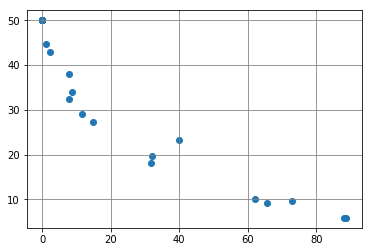

In [10]:
HL=80
SL=150
phi=0.95
nofvar=2
Tmax=1000
Tmin=0.01
alpha=0.85
N=300
C=1
archive=iarch(30,50, phi, nofvar)
fun1=np.zeros(archive.shape[0])
fun2=np.zeros(archive.shape[0])
for lin in range(archive.shape[0]):
    fun1[lin], fun2[lin]=ff(archive[lin])
o=np.random.choice(np.arange(archive.shape[0]))

#setup as soluções corrente

x_i=archive[o]
f1c=fun1[o]
f2c=fun2[o]
r=0
max_r=20
#plot das soluções contida no archive 
plt.scatter(fun1, fun2)
plt.grid(b=None, color='grey', which='major', axis='both')

In [11]:
while(Tmax>Tmin):
    Tmax=Tmax*alpha
    ciclo=0
    while ciclo<N:
        #print("ciclo:", ciclo)
        x_j=newsol(x_i, phi, C)
        f1n, f2n = ff(x_j)
        fun1=np.zeros(archive.shape[0])
        fun2=np.zeros(archive.shape[0])
        for i in range(archive.shape[0]):
            fun1[i], fun2[i]=ff(archive[i])
        R1, R2 = maxmin(fun1, fun2)
        aux=np.zeros(archive.shape[0])
        #print("valores da função corrente",f1c, f2c)
        #print("valores da função nova", f1n, f2n)
        deltaE=maxdom(fun1,fun2,f1n, f2n, R1,R2)-maxdom(fun1,fun2,f1c, f2c, R1,R2)
        #print("a variação de energia", deltaE)
        prob=np.exp(-deltaE/Tmax)
        p=np.random.rand()
        #print("prob=", prob, "p(aleatorio)=", p)
        if(deltaE<=0 or p<prob):
            x_i=x_j
            f1c=f1n
            f2c=f2n
            #print("a solução nova aceita")
            aux=maxdom2(fun1,fun2,f1n, f2n, R1,R2)
            if aux<=0:
                aux=0
                
            #print("os valores de k=", k, "souções dominadas k_d=", k_d, "E=0", knd)
            if aux==0:#
                #print("adicionado a nova solução")
                archive=np.vstack([archive, x_j])
                #print(archive.shape[0])
                if archive.shape[0]>SL:
                    archive=clust(HL,archive, nofvar)
                    if inc(x_i, archive):
                        if r<max_r:
                            archive=np.vstack([archive, x_i])
                            #print("adicionado novamente")
                        else:
                            ale=np.random.choice(np.arange(archive.shape[0]))
                            x_i=archive[ale]
                            r=r+1
                    else:
                        r=0
        ciclo=ciclo+1
                
end=time.time()
minu=np.around((end-start)/60,0)
sec=np.around((end-start)%60,0)
print("archive", archive.shape[0])
print(end-start)
print(minu, "min", sec, "segundos")     

archive 102
36.28957271575928
1.0 min 36.0 segundos


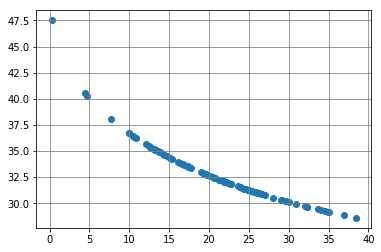

In [12]:
for lin in range(archive.shape[0]-1):
    fun1[lin], fun2[lin]=ff(archive[lin])
plt.scatter(fun1, fun2)
plt.grid(b=None, color='grey', which='major', axis='both')

def displacement(P,Q):
    displace=0
    Ps=P.shape[0]
    Qs=Q.shape[0]
    for i in range(0,Ps-1):
        dif=0
        mvalue=0
        for u in range(0,Qs-1):
            aux=0
            for col in range(0,P.shape[1]):
                aux=aux+(P[i][col]-Q[u][col])**2
            dif=np.sqrt(aux)
            if dif<mvalue:
                mvalue=dif
        displace=displace+dif
    displace=displace/Ps
    return displace

In [13]:
# escolher o ponto de referência 
f1max=max(fun1)
f2max=max(fun2)
#numeros de pontos a serem seecionado
npontos=10
print("Os valores máximo, fun1, fun2", f1max, f2max, "respectivamente")
pref=([f1max, f2max])


Os valores máximo, fun1, fun2 38.43481766587708 47.49980403416697 respectivamente
